In [403]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("EdStatsData.csv", ",")

Another way to think of unsupervised machine learning is dimensionality reduc- 
tion. Some examples of algorithms that do dimensionality reduction are principal 
components analysis (PCA), singular value decomposition (SVD), t-SNE (t- 
distributed stochastic neighbor embedding), LLE (locally linear embedding), and 
more. 

In [405]:
all_unique_indicators = data["Indicator Name"].unique()

rows_with_highest_ed= []
for row in all_unique_indicators: 
    if "Wittgenstein Projection" in row and "highest" in row and "Total" in row and "Percentage" in row:
        rows_with_highest_ed.append(row)
rows_with_highest_ed_attained = data[data["Indicator Name"].isin(rows_with_highest_ed)]


In [406]:
filtered_data_frame = pd.DataFrame({'Country Name': rows_with_highest_ed_attained["Country Name"], 'Country Code': rows_with_highest_ed_attained["Country Code"], 
                         '2010': rows_with_highest_ed_attained["2010"], '2015': rows_with_highest_ed_attained["2015"], 'Indicator Name': rows_with_highest_ed_attained["Indicator Name"], 
                         'Indicator Code': rows_with_highest_ed_attained["Indicator Code"]})
all_countries = filtered_data_frame["Country Name"].unique()
filtered_data_frame = filtered_data_frame[(filtered_data_frame["2010"].notnull()) & (filtered_data_frame["2015"].notnull())]

In [407]:

filtered_data_frame[(filtered_data_frame["Country Name"] == filtered_data_frame.iloc[0]["Country Name"]) &
                   (filtered_data_frame["Indicator Name"] == filtered_data_frame.iloc[0]["Indicator Name"])]
filtered_data_frame.shape
pisa = pd.read_csv("clean_PISA.csv")
filtered_data_frame = filtered_data_frame[filtered_data_frame["Country Name"].isin(pisa["Country Name"])]

In [408]:
cols =rows_with_highest_ed.append("Country Name")
dataframe_by_indicator_2010 = pd.DataFrame( columns=cols)
#dataframe_by_indicator_2010["Country Name"] = all_countries
dataframes = []
dataframe_by_indicator_2010
for indicator in rows_with_highest_ed: 
    vals = filtered_data_frame[filtered_data_frame["Indicator Name"] == indicator]
    countries = filtered_data_frame[filtered_data_frame["Indicator Name"] == indicator]["Country Name"]
    dataframes.append(vals)
dataframes[0].head()



    

,2010,2015,Country Code,Country Name,Indicator Code,Indicator Name
120669,0.10,0.09,ARG,Argentina,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
131664,0.01,0.01,AUS,Australia,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
135329,0.00,0.00,AUT,Austria,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
160984,0.00,0.00,BEL,Belgium,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
190304,0.14,0.13,BRA,Brazil,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...


In [471]:
filtered_data_frame.to_csv("Highest level of educational attainment.csv")

In [540]:
from collections import defaultdict
dictionary_2010 = defaultdict(float)
dictionary_2015 = defaultdict(float)
first = dataframes[0]
first = first.reset_index()
#print(dataframes[0])
dictionary_2010["Country Name"] = first["Country Name"]
dictionary_2015["Country Name"] = first["Country Name"]
i = 0

for frame in dataframes: 
    i += 1
    if i != 67: 
        frame = frame.reset_index()
        dictionary_2010[frame["Indicator Name"].unique()[0] + " 2010"] = frame["2010"]
        dictionary_2015[frame["Indicator Name"].unique()[0] + " 2015"] = frame["2015"]
        
dictionary_2010

defaultdict(float, {'Country Name': 0                Argentina
             1                Australia
             2                  Austria
             3                  Belgium
             4                   Brazil
             5                 Bulgaria
             6                   Canada
             7                    Chile
             8                 Colombia
             9                  Croatia
             10          Czech Republic
             11                 Denmark
             12                 Estonia
             13                 Finland
             14                  France
             15                 Germany
             16                  Greece
             17    Hong Kong SAR, China
             18                 Hungary
             19                 Iceland
             20               Indonesia
             21                 Ireland
             22                  Israel
             23                   Italy
             24  

In [614]:
df = pd.DataFrame.from_dict(dictionary_2010, 'columns')
df = df.drop(["Country Name"], axis=1)
df

,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Incomplete Primary. Total 2010,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total 2010,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. No Education. Total 2010,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total 2010,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Primary. Total 2010,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total 2010,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Total 2010,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total 2010,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. No Education. Total 2010,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Total 2010,...,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. No Education. Total 2010,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Total 2010,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Primary. Total 2010,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Upper Secondary. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2010,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2010
0,0.10,0.19,0.03,0.11,0.28,0.29,0.05,0.62,0.01,0.00,...,0.09,0.06,0.38,0.12,0.08,0.14,0.02,0.09,0.21,0.22
1,0.01,0.16,0.01,0.30,0.10,0.43,0.00,0.33,0.00,0.01,...,0.02,0.16,0.40,0.21,0.01,0.13,0.01,0.24,0.08,0.35
2,0.00,0.25,0.00,0.22,0.04,0.48,0.00,0.57,0.00,0.03,...,0.00,0.11,0.05,0.33,0.00,0.22,0.00,0.19,0.04,0.41
3,0.00,0.24,0.03,0.31,0.11,0.31,0.00,0.59,0.00,0.01,...,0.07,0.10,0.43,0.13,0.00,0.20,0.03,0.26,0.09,0.26
4,0.14,0.19,0.09,0.09,0.21,0.26,0.05,0.46,0.03,0.00,...,0.39,0.04,0.19,0.07,0.11,0.15,0.07,0.07,0.16,0.20
5,0.01,0.25,0.01,0.19,0.05,0.49,0.02,0.62,0.01,0.00,...,0.03,0.10,0.26,0.19,0.01,0.21,0.01,0.16,0.05,0.42
6,0.00,0.08,0.01,0.50,0.05,0.36,0.00,0.28,0.00,0.04,...,0.03,0.32,0.26,0.25,0.00,0.07,0.01,0.42,0.04,0.30
7,0.09,0.21,0.03,0.13,0.16,0.39,0.02,0.56,0.00,0.00,...,0.14,0.04,0.20,0.16,0.07,0.16,0.02,0.10,0.12,0.30
8,0.15,0.11,0.07,0.16,0.27,0.25,0.05,0.36,0.02,0.04,...,0.31,0.04,0.24,0.05,0.11,0.08,0.05,0.12,0.19,0.17
9,0.03,0.18,0.02,0.14,0.07,0.56,0.01,0.45,0.00,0.00,...,0.11,0.07,0.34,0.18,0.02,0.16,0.01,0.12,0.06,0.48


In [536]:
df = df.fillna(0)
df = df.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2010'], ascending=[1])

In [427]:
df.shape

(52, 67)

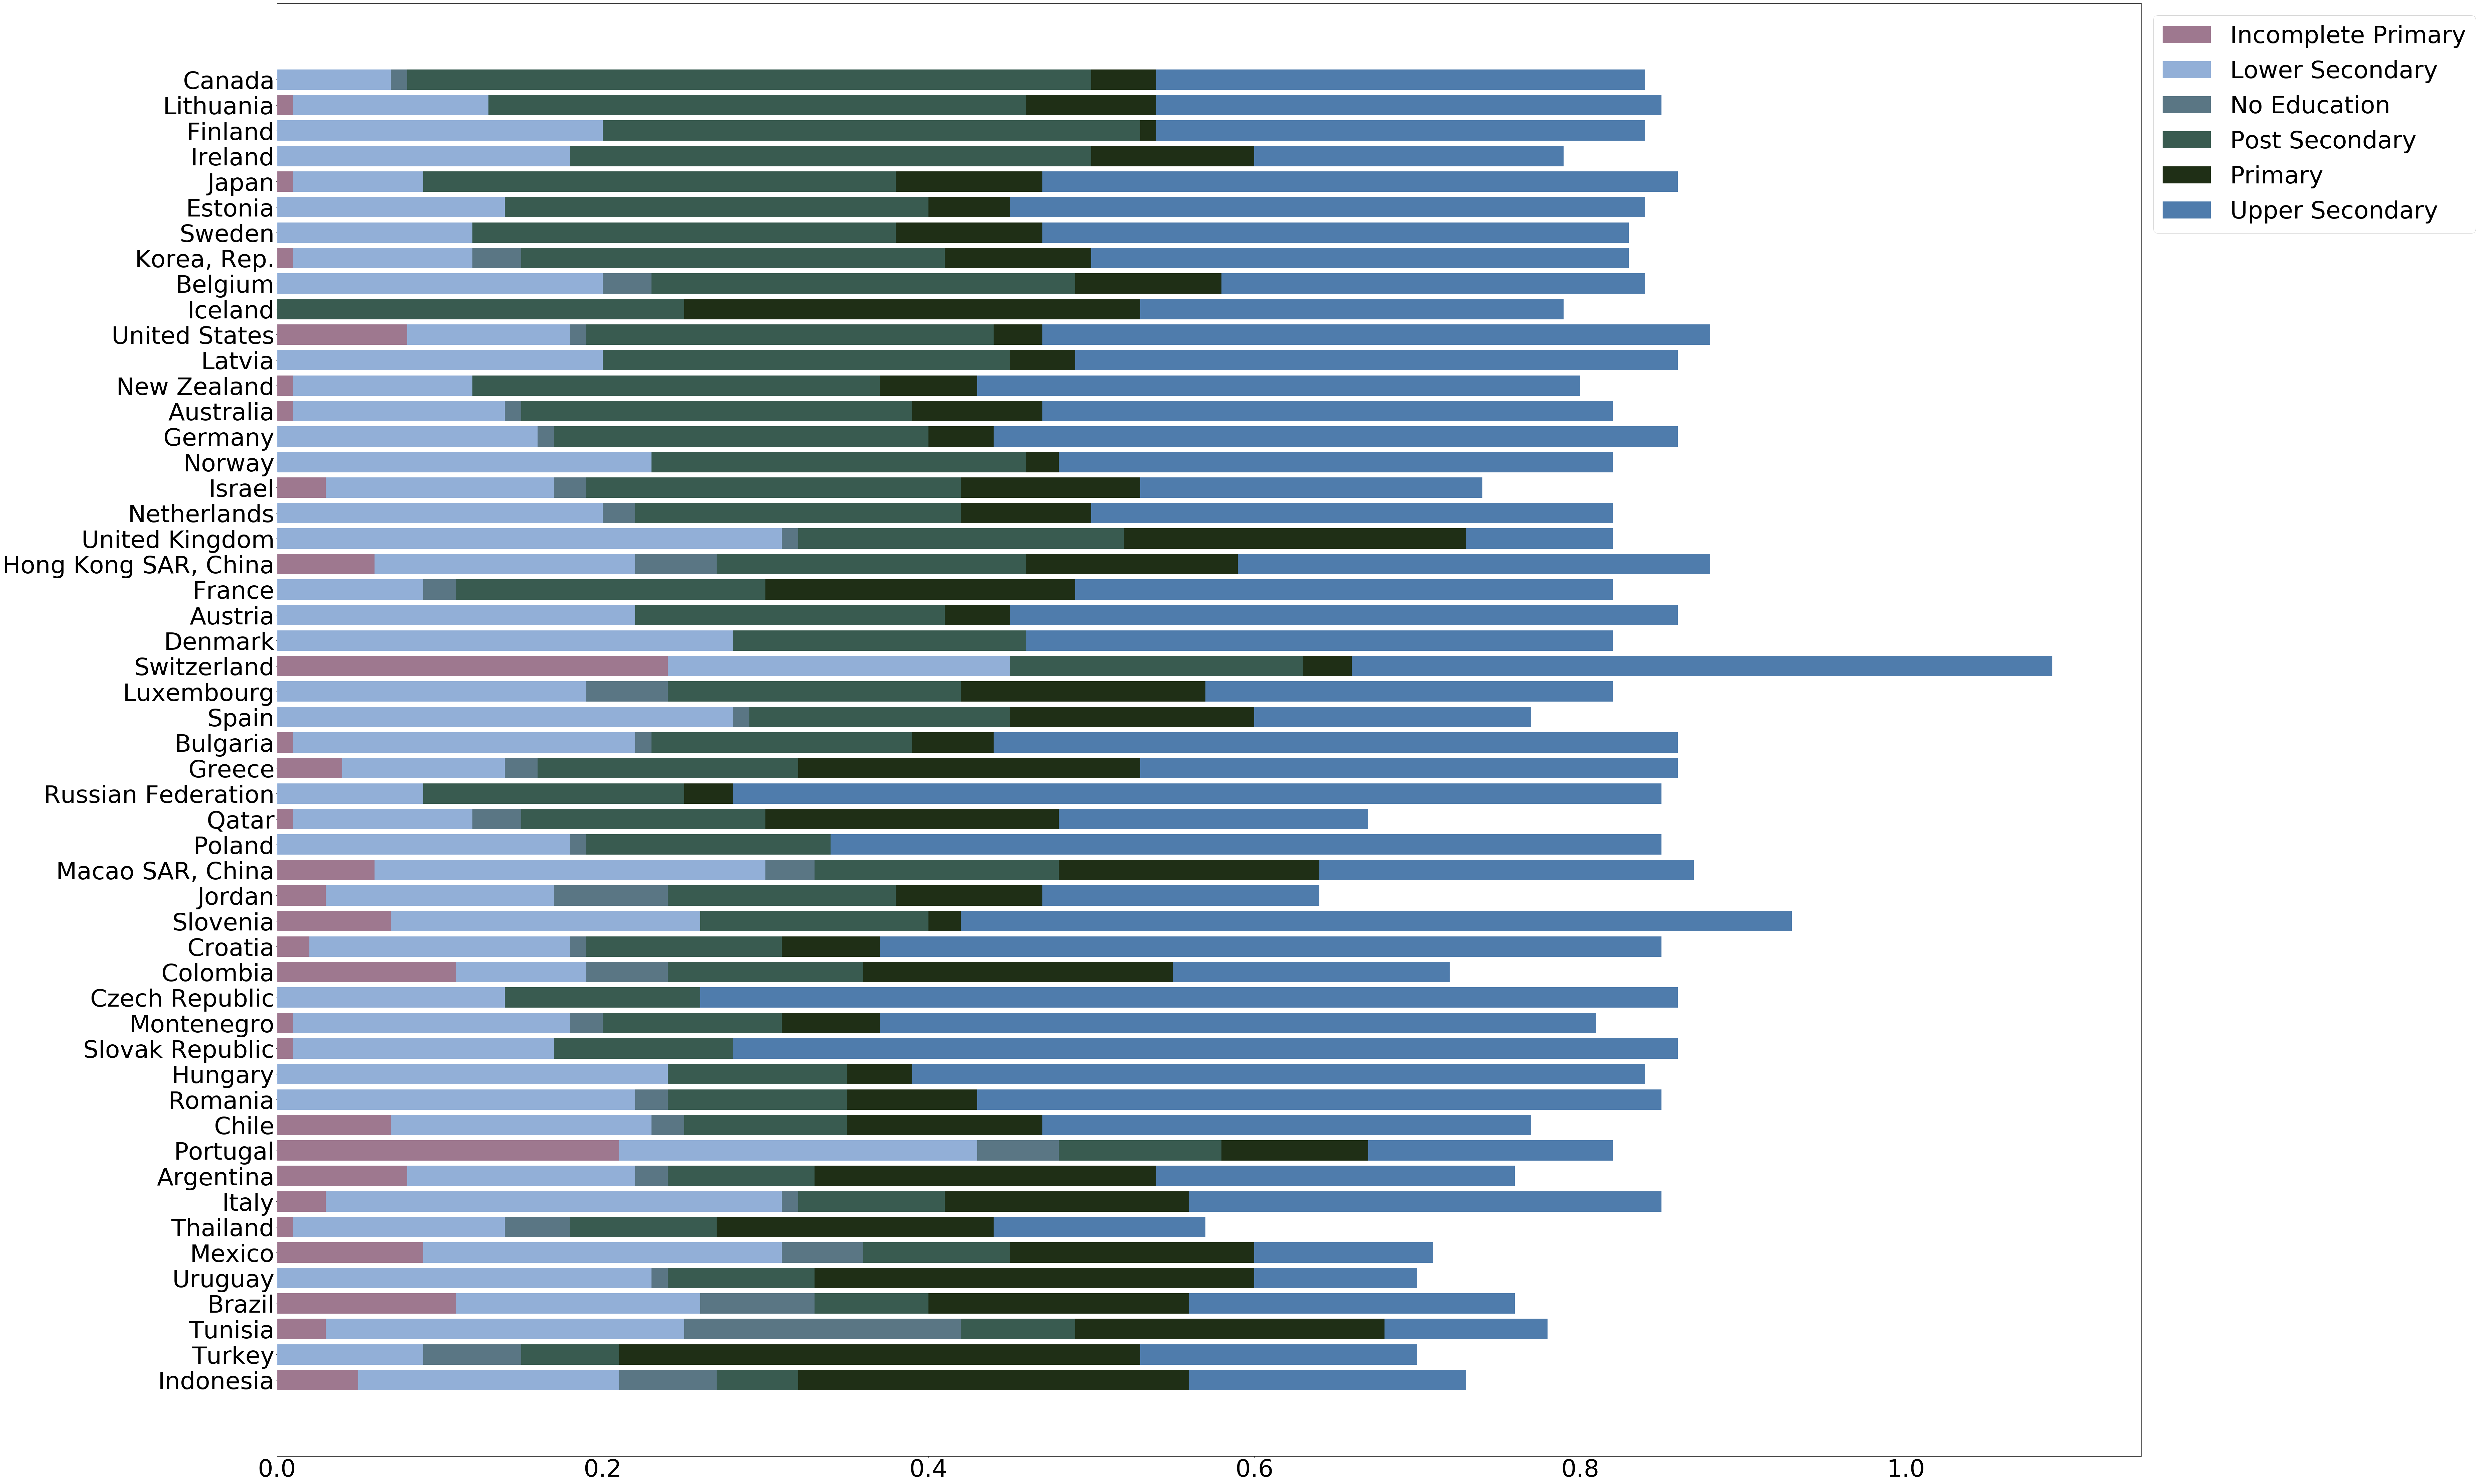

In [537]:

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
barWidth = 0.85
import matplotlib
from matplotlib import rc
matplotlib.rcParams.update({'font.size': 72})
names = df["Country Name"]
first = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2010"]
sec = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2010"]
third = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2010"]
fourth = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2010"]
fifth = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2010"]
sixth = df["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2010"]
r = [i for i in range(52)]
fig = plt.figure(figsize=(100,80))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(names)) 
y_pos=np.arange(len(names))
left = np.zeros(len(names))

patch_handles.append(ax.barh(y_pos, first, color="#9E788F", align='center', left=left, label='Incomplete Primary'))
left+=first

patch_handles.append(ax.barh(y_pos, sec, color="#92AFD7", align='center', left=left, label='Lower Secondary'))
left+=sec

patch_handles.append(ax.barh(y_pos, third, color="#5A7684", align='center', left=left, label='No Education'))
left+=third

patch_handles.append(ax.barh(y_pos, fourth, color="#395B50", align='center', left=left, label='Post Secondary'))
left+=fourth

patch_handles.append(ax.barh(y_pos, fifth, color="#1F2F16", align='center', left=left, label='Primary'))
left+=fifth

patch_handles.append(ax.barh(y_pos, sixth, color="#4F7CAC", align='center', left=left, label='Upper Secondary'))
left+=sixth

#for j in range(len(patch_handles)):
 #   for i, patch in enumerate(patch_handles[j].get_children()):
  #      bl = patch.get_xy()
   #     x = 45 * patch.get_width() + bl[0]
    #    y = 45*patch.get_height() + bl[1]
        #ax.text(x,y, "12", ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(names)

#plt.xlabel("group")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#plt.subplots_adjust(right=0.85)
plt.show()
              

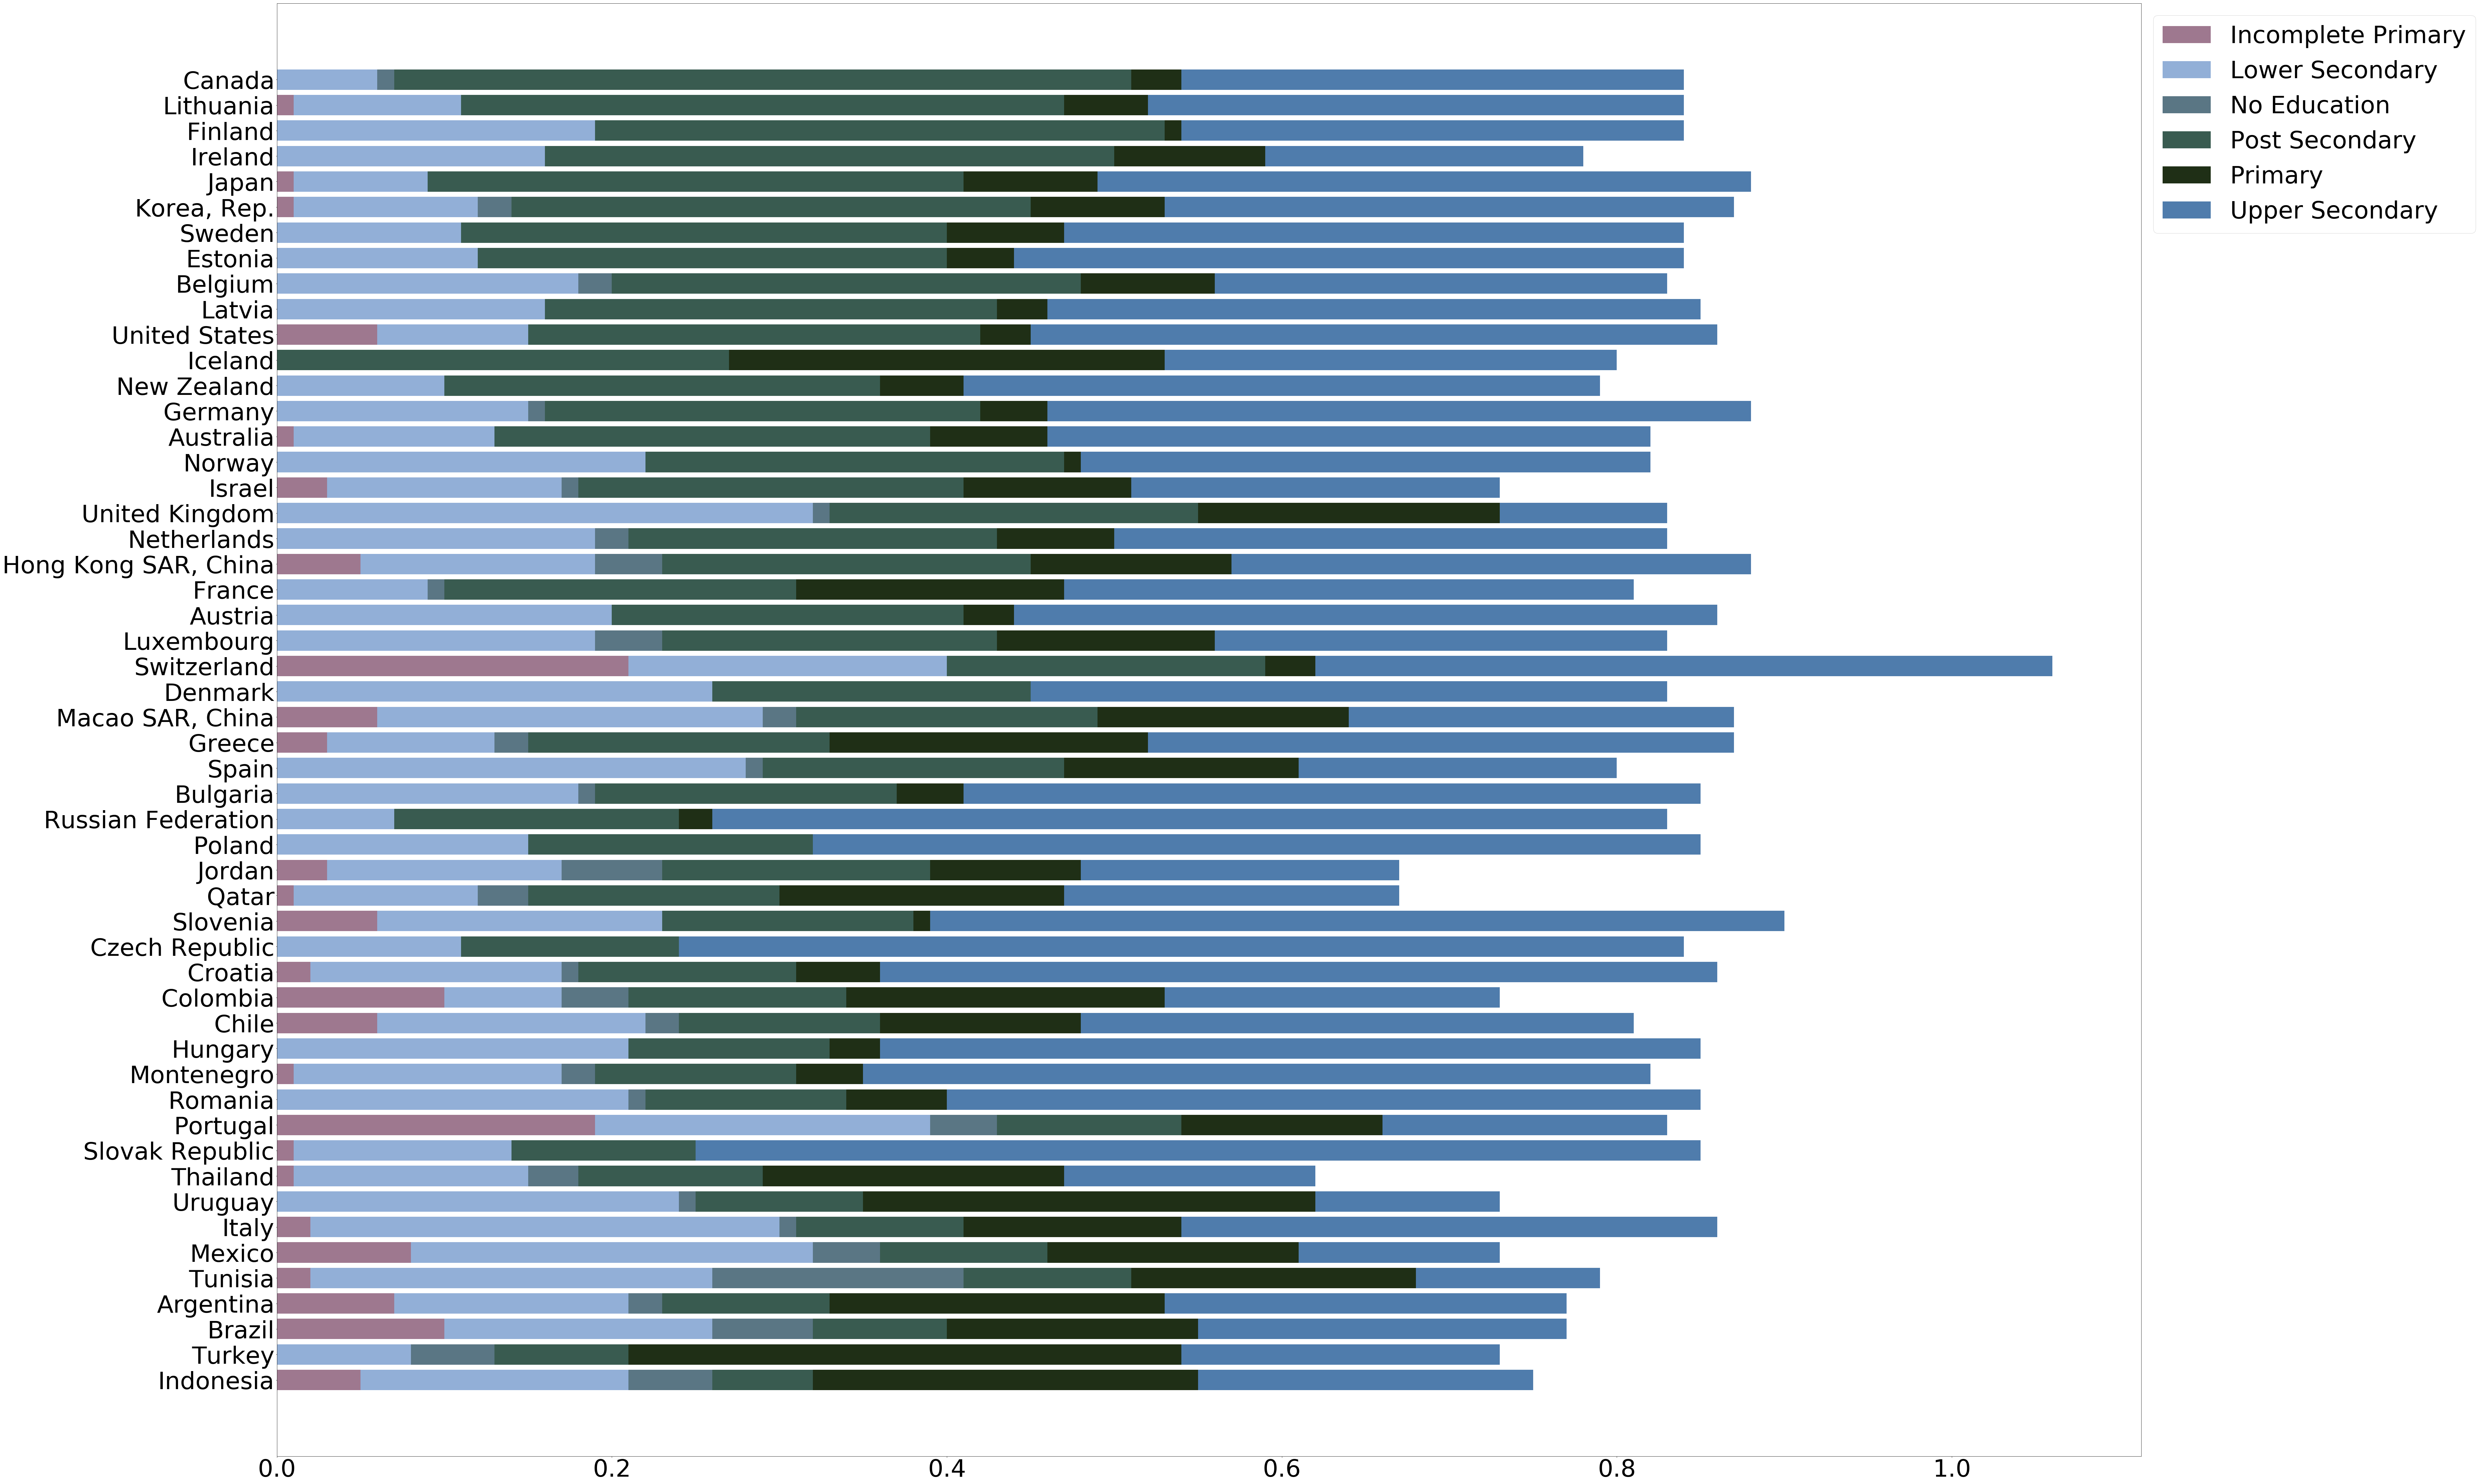

In [541]:
df1 = pd.DataFrame.from_dict(dictionary_2015, 'columns')
df1 = df1.fillna(0)
df1 = df1.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015'], ascending=[1])
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
barWidth = 0.85
import matplotlib
from matplotlib import rc
matplotlib.rcParams.update({'font.size': 72})
names = df1["Country Name"]
first = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2015"]
sec = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2015"]
third = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2015"]
fourth = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015"]
fifth = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2015"]
sixth = df1["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2015"]
r = [i for i in range(52)]
fig = plt.figure(figsize=(100,80))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(names)) 
y_pos=np.arange(len(names))
left = np.zeros(len(names))

patch_handles.append(ax.barh(y_pos, first, color="#9E788F", align='center', left=left, label='Incomplete Primary'))
left+=first

patch_handles.append(ax.barh(y_pos, sec, color="#92AFD7", align='center', left=left, label='Lower Secondary'))
left+=sec

patch_handles.append(ax.barh(y_pos, third, color="#5A7684", align='center', left=left, label='No Education'))
left+=third

patch_handles.append(ax.barh(y_pos, fourth, color="#395B50", align='center', left=left, label='Post Secondary'))
left+=fourth

patch_handles.append(ax.barh(y_pos, fifth, color="#1F2F16", align='center', left=left, label='Primary'))
left+=fifth

patch_handles.append(ax.barh(y_pos, sixth, color="#4F7CAC", align='center', left=left, label='Upper Secondary'))
left+=sixth

#for j in range(len(patch_handles)):
 #   for i, patch in enumerate(patch_handles[j].get_children()):
  #      bl = patch.get_xy()
   #     x = 45 * patch.get_width() + bl[0]
    #    y = 45*patch.get_height() + bl[1]
        #ax.text(x,y, "12", ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(names)

#plt.xlabel("group")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#plt.subplots_adjust(right=0.85)
plt.show()
              

In [615]:
df1 = df1.drop(["Country Name"], axis=1)

In [261]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
xstd = StandardScaler().fit_transform(df)

In [146]:
pca = PCA().fit(xstd)

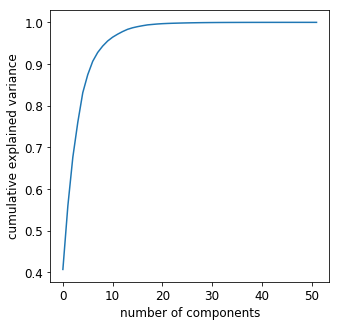

In [149]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
matplotlib.rcParams.update({'font.size': 12})
rcParams['figure.figsize'] = 5, 5
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [180]:
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array

In [181]:
x = np.array(df)
kmean, _ = kmeans(x, 3)

In [155]:
idx, _ = vq(x, kmean)


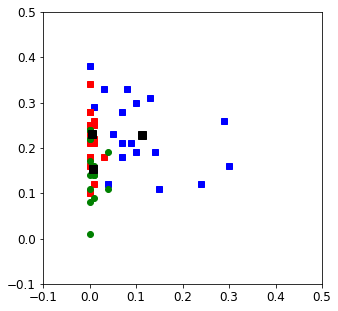

In [182]:

plt.plot(x[idx==0,0],x[idx==0,1],'sb',
     x[idx==1,0],x[idx==1,1],'sr',
     x[idx==2,0],x[idx==2,1],'og')
#rcParams['figure.figsize'] = 5,5
plt.plot(kmean[:,0],kmean[:,1],'sk',markersize=8)
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.5)
plt.show()

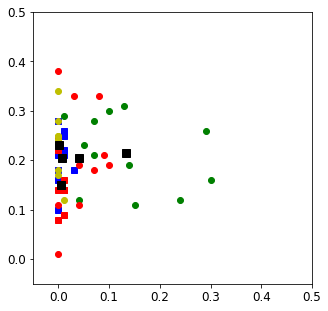

In [190]:
x = np.array(df)
kmean, _ = kmeans(x, 5)
idx, _ = vq(x, kmean)
plt.plot(x[idx==0,0],x[idx==0,1],'sb',
     x[idx==1,0],x[idx==1,1],'sr',
     x[idx==2,0],x[idx==2,1],'og',
        x[idx==3,0],x[idx==3,1],'oy',
        x[idx==4,0],x[idx==4,1],'or')
#rcParams['figure.figsize'] = 5,5
plt.plot(kmean[:,0],kmean[:,1],'sk',markersize=8)
plt.xlim(-0.05, 0.5)
plt.ylim(-0.05, 0.5)
plt.show()

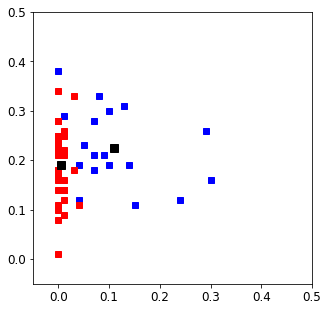

In [191]:
x = np.array(df)
kmean, _ = kmeans(x, 2)
idx, _ = vq(x, kmean)
plt.plot(x[idx==0,0],x[idx==0,1],'sb',
     x[idx==1,0],x[idx==1,1],'sr')
#rcParams['figure.figsize'] = 5,5
plt.plot(kmean[:,0],kmean[:,1],'sk',markersize=8)
plt.xlim(-0.05, 0.5)
plt.ylim(-0.05, 0.5)
plt.show()

In [193]:
pca = PCA(n_components=5)
comp = pca.fit_transform(xstd)
pdf = pd.DataFrame( data=comp, columns=['comp1', 'comp2', 'comp3', 'comp4','comp5'])

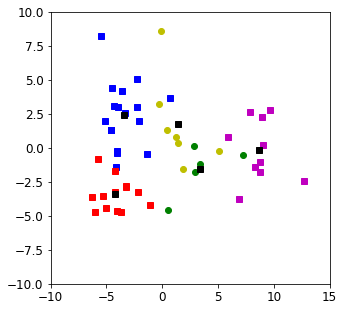

In [222]:
x = np.array(pdf)
kmean, _ = kmeans(x, 5)
idx, _ = vq(x, kmean)
plt.plot(x[idx==0,0],x[idx==0,1],'sb',
     x[idx==1,0],x[idx==1,1],'sr',
     x[idx==2,0],x[idx==2,1],'og',
        x[idx==3,0],x[idx==3,1],'oy',
        x[idx==4,0],x[idx==4,1],'sm')
#rcParams['figure.figsize'] = 5,5
plt.plot(kmean[:,0],kmean[:,1],'sk',markersize=6)
plt.xlim(-10, 15)
plt.ylim(-10, 10)
plt.show()

In [239]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for i in range(52):
    if idx[i] == 4:
        cluster5.append(df1["Country Name"][i])
    if idx[i] == 3:
        cluster4.append(df1["Country Name"][i])   
    if idx[i] == 2:
        cluster3.append(df1["Country Name"][i])
    if idx[i] == 1:
        cluster2.append(df1["Country Name"][i])
    if idx[i] == 0:
        cluster1.append(df1["Country Name"][i])


In [240]:
cluster1

['Australia',
 'Belgium',
 'Canada',
 'Estonia',
 'Finland',
 'Germany',
 'Ireland',
 'Israel',
 'Japan',
 'Korea, Rep.',
 'Latvia',
 'Lithuania',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Sweden',
 'United States']

In [241]:
cluster2

['Austria',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Hungary',
 'Montenegro',
 'Poland',
 'Romania',
 'Russian Federation',
 'Slovak Republic',
 'Slovenia',
 'Switzerland']

In [246]:
cluster3

['Italy', 'Macao SAR, China', 'Spain', 'United Kingdom', 'Uruguay']

In [245]:
cluster4

['Argentina',
 'Chile',
 'France',
 'Greece',
 'Hong Kong SAR, China',
 'Iceland',
 'Luxembourg']

In [243]:
cluster5

['Brazil',
 'Colombia',
 'Indonesia',
 'Jordan',
 'Mexico',
 'Portugal',
 'Qatar',
 'Thailand',
 'Tunisia',
 'Turkey']

In [244]:
idx

array([3, 0, 1, 0, 4, 1, 0, 3, 4, 1, 1, 1, 0, 0, 3, 0, 3, 3, 1, 3, 4, 0, 0,
       2, 0, 4, 0, 0, 0, 3, 2, 4, 1, 0, 0, 0, 1, 4, 4, 1, 1, 1, 1, 2, 0, 1,
       4, 4, 4, 2, 0, 2])

In [247]:
from sklearn.cluster import AgglomerativeClustering

In [248]:
clustering = AgglomerativeClustering(5).fit(x)

In [253]:
lab = clustering.labels_
lab

array([0, 1, 1, 0, 2, 3, 1, 0, 2, 3, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 0, 2, 3, 0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3,
       2, 4, 2, 0, 1, 0], dtype=int64)

In [254]:
cluster1a = []
cluster2a = []
cluster3a = []
cluster4a = []
cluster5a = []
for i in range(52):
    if lab[i] == 4:
        cluster5a.append(df1["Country Name"][i])
    if lab[i] == 3:
        cluster4a.append(df1["Country Name"][i])   
    if lab[i] == 2:
        cluster3a.append(df1["Country Name"][i])
    if lab[i] == 1:
        cluster2a.append(df1["Country Name"][i])
    if lab[i] == 0:
        cluster1a.append(df1["Country Name"][i])


In [255]:
cluster1a

['Argentina',
 'Belgium',
 'Chile',
 'France',
 'Greece',
 'Hong Kong SAR, China',
 'Iceland',
 'Italy',
 'Luxembourg',
 'Macao SAR, China',
 'Netherlands',
 'Spain',
 'United Kingdom',
 'Uruguay']

In [256]:
cluster2a

['Australia',
 'Austria',
 'Canada',
 'Denmark',
 'Estonia',
 'Finland',
 'Germany',
 'Ireland',
 'Israel',
 'Japan',
 'Korea, Rep.',
 'Latvia',
 'Lithuania',
 'New Zealand',
 'Norway',
 'Sweden',
 'United States']

In [257]:
cluster3a

['Brazil',
 'Colombia',
 'Indonesia',
 'Jordan',
 'Mexico',
 'Portugal',
 'Qatar',
 'Thailand',
 'Turkey']

In [258]:
cluster4a

['Bulgaria',
 'Croatia',
 'Czech Republic',
 'Hungary',
 'Montenegro',
 'Poland',
 'Romania',
 'Russian Federation',
 'Slovak Republic',
 'Slovenia',
 'Switzerland']

In [259]:
cluster5a

['Tunisia']

In [369]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(xstd,  method='ward')

In [370]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [371]:
c, coph_dists = cophenet(Z, pdist(xstd))


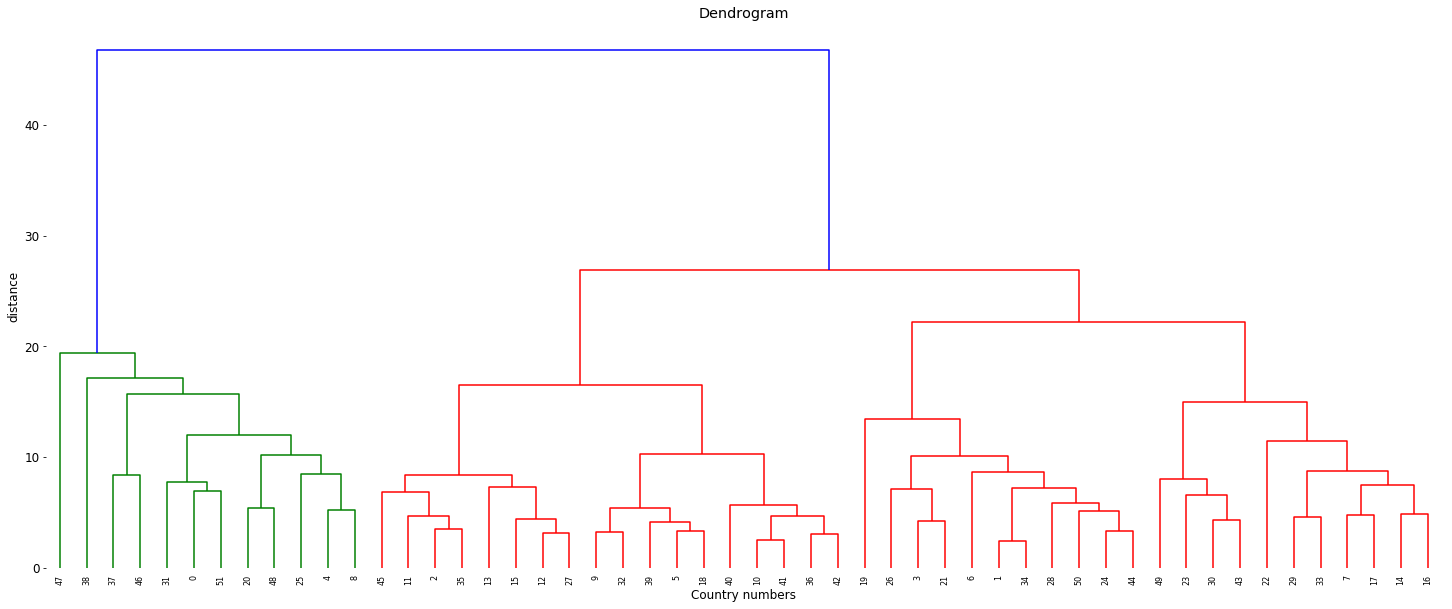

In [372]:
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette

import seaborn as sns

plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Country numbers')
plt.ylabel('distance')
den = dendrogram(
    Z,
    #labels = dictionary_2010["Country Name"],
    leaf_rotation=90.,  
    leaf_font_size=8., 
)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);
plt.show()


In [373]:
from matplotlib.colors import rgb2hex, colorConverter
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes
get_cluster_classes(den)

g,"['37', '46', '0', '51', '31', '20', '48', '4', '8', '25', '38', '47']"
r,"['2', '35', '11', '45', '12', '27', '15', '13', '9', '32', '5', '18', '39', '10', '41', '36', '42', '40', '3', '21', '26', '1', '34', '24', '44', '50', '28', '6', '19', '30', '43', '23', '49', '29', '33', '7', '17', '14', '16', '22', '7']"


In [271]:
#df1 = df1.drop(['Country Name'], axis=1)
xstd1 = StandardScaler().fit_transform(df1)
pca1 = PCA(n_components=5)
comp1 = pca1.fit_transform(xstd1)
pdf1 = pd.DataFrame( data=comp1, columns=['comp1', 'comp2', 'comp3', 'comp4','comp5'])
x1 = np.array(pdf1)

clustering1 = AgglomerativeClustering(5).fit(x1)
lab1 = clustering1.labels_
lab1

array([0, 3, 2, 3, 1, 2, 3, 0, 1, 2, 2, 2, 3, 2, 0, 2, 0, 0, 2, 3, 1, 3, 3,
       0, 3, 1, 3, 2, 3, 0, 0, 1, 2, 0, 3, 2, 2, 1, 1, 2, 2, 2, 2, 0, 3, 2,
       1, 4, 1, 0, 3, 0], dtype=int64)

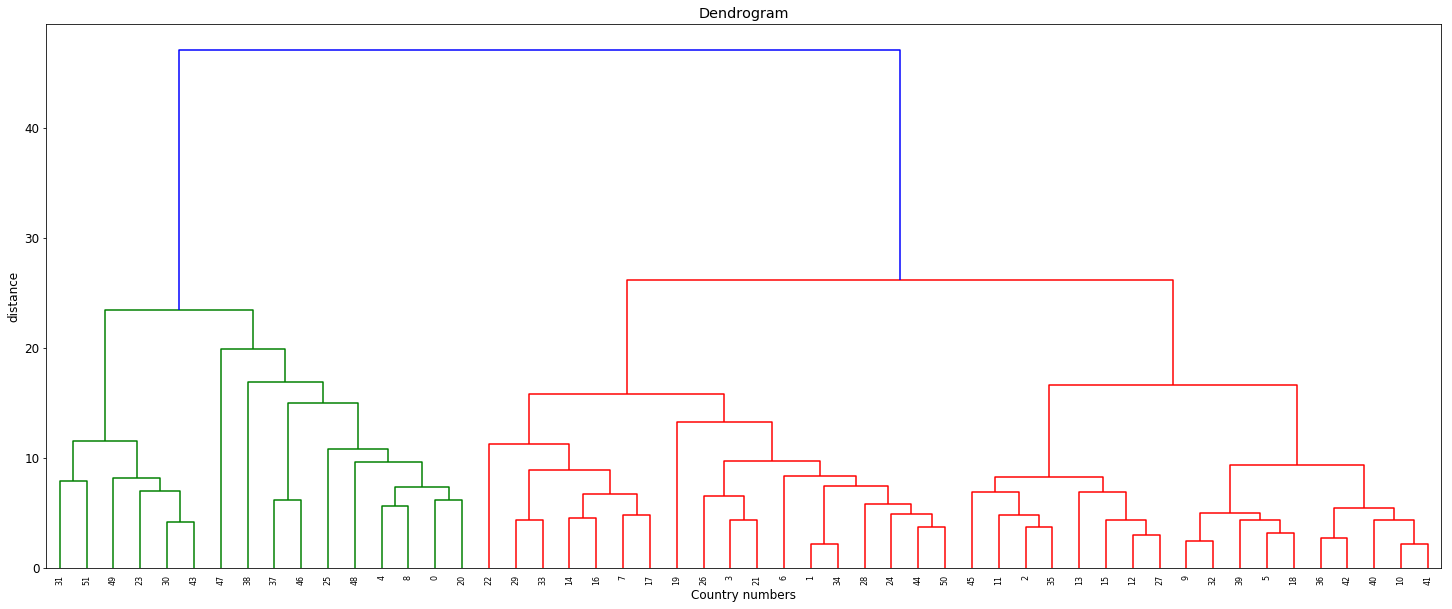

In [386]:
Z1 = linkage(xstd1, 'ward')
c1, coph_dists1 = cophenet(Z1, pdist(xstd1))
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Country numbers')
plt.ylabel('distance')
den2 = dendrogram(
    Z1,
    leaf_rotation=90.,  
    leaf_font_size=8., 
)
plt.show()

In [387]:
get_cluster_classes(den2)

g,"['31', '51', '30', '43', '23', '49', '37', '46', '4', '8', '0', '20', '48', '25', '38', '47']"
r,"['29', '33', '14', '16', '7', '17', '22', '14', '3', '21', '26', '1', '34', '44', '50', '24', '28', '6', '19', '2', '35', '11', '45', '12', '27', '15', '13', '9', '32', '5', '18', '39', '36', '42', '10', '41', '40']"


In [276]:
cluster1a1 = []
cluster2a1 = []
cluster3a1 = []
cluster4a1 = []
cluster5a1 = []
for i in range(52):
    if lab1[i] == 4:
        cluster5a1.append(dictionary_2010["Country Name"][i])
    if lab1[i] == 3:
        cluster4a1.append(dictionary_2010["Country Name"][i])   
    if lab1[i] == 2:
        cluster3a1.append(dictionary_2010["Country Name"][i])
    if lab1[i] == 1:
        cluster2a1.append(dictionary_2010["Country Name"][i])
    if lab1[i] == 0:
        cluster1a1.append(dictionary_2010["Country Name"][i])

In [277]:
cluster1a1

['Argentina',
 'Chile',
 'France',
 'Greece',
 'Hong Kong SAR, China',
 'Italy',
 'Luxembourg',
 'Macao SAR, China',
 'Netherlands',
 'Spain',
 'United Kingdom',
 'Uruguay']

In [280]:
cluster2a1

['Brazil',
 'Colombia',
 'Indonesia',
 'Jordan',
 'Mexico',
 'Portugal',
 'Qatar',
 'Thailand',
 'Turkey']

In [281]:
cluster3a1

['Austria',
 'Bulgaria',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Finland',
 'Germany',
 'Hungary',
 'Latvia',
 'Montenegro',
 'Norway',
 'Poland',
 'Romania',
 'Russian Federation',
 'Slovak Republic',
 'Slovenia',
 'Switzerland']

In [282]:
cluster4a1

['Australia',
 'Belgium',
 'Canada',
 'Estonia',
 'Iceland',
 'Ireland',
 'Israel',
 'Japan',
 'Korea, Rep.',
 'Lithuania',
 'New Zealand',
 'Sweden',
 'United States']

In [283]:
cluster5a1

['Tunisia']

Estonia, Latvia and Germany, Austria, Norway are most similar. Let's see what the future will hold.

In [474]:
filtered_data_frame1 = pd.DataFrame({'Country Name': rows_with_highest_ed_attained["Country Name"], 'Country Code': rows_with_highest_ed_attained["Country Code"], 
                         '2020': rows_with_highest_ed_attained["2020"], '2030': rows_with_highest_ed_attained["2030"],'2040': rows_with_highest_ed_attained["2040"],
                                    '2040': rows_with_highest_ed_attained["2040"],'2050': rows_with_highest_ed_attained["2050"], '2060': rows_with_highest_ed_attained["2060"],
                                     '2070': rows_with_highest_ed_attained["2070"], '2080': rows_with_highest_ed_attained["2080"],
                                     '2090': rows_with_highest_ed_attained["2090"], '2100': rows_with_highest_ed_attained["2100"], 'Indicator Name': rows_with_highest_ed_attained["Indicator Name"], 
                         'Indicator Code': rows_with_highest_ed_attained["Indicator Code"]})
all_countries = filtered_data_frame1["Country Name"].unique()
#filtered_data_frame = filtered_data_frame[(filtered_data_frame["2010"].notnull()) & (filtered_data_frame["2015"].notnull())]

In [475]:
filtered_data_frame1 = filtered_data_frame1[filtered_data_frame1["Country Name"].isin(pisa["Country Name"])]
dataframes1 = []

for indicator in rows_with_highest_ed: 
    vals = filtered_data_frame1[filtered_data_frame1["Indicator Name"] == indicator]
    countries = filtered_data_frame1[filtered_data_frame1["Indicator Name"] == indicator]["Country Name"]
    dataframes1.append(vals)
dataframes1[0].head()

,2020,2030,2040,2050,2060,2070,2080,2090,2100,Country Code,Country Name,Indicator Code,Indicator Name
120669,0.07,0.05,0.03,0.02,0.01,0.01,0.01,0.00,0.0,ARG,Argentina,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
131664,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,AUS,Australia,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
135329,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,AUT,Austria,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
160984,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,BEL,Belgium,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
190304,0.11,0.09,0.06,0.05,0.03,0.02,0.01,0.01,0.0,BRA,Brazil,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...


In [618]:
#print(dataframes1[0]["Indicator Name"].unique()[0])
dictionary_2020 = defaultdict(float)
dictionary_2030 = defaultdict(float)
dictionary_2040 = defaultdict(float)
dictionary_2050 = defaultdict(float)
dictionary_2060 = defaultdict(float)
dictionary_2070 = defaultdict(float)
dictionary_2080 = defaultdict(float)
dictionary_2090 = defaultdict(float)
dictionary_2100 = defaultdict(float)
#first = first.reset_index()
#print(dataframes[0])
dictionary_2020["Country Name"] =dictionary_2010["Country Name"]
dictionary_2030["Country Name"] = dictionary_2010["Country Name"]
dictionary_2040["Country Name"] =dictionary_2010["Country Name"]
dictionary_2050["Country Name"] = dictionary_2010["Country Name"]
dictionary_2060["Country Name"] = dictionary_2010["Country Name"]
dictionary_2070["Country Name"] = dictionary_2010["Country Name"]
dictionary_2080["Country Name"] = dictionary_2010["Country Name"]
dictionary_2090["Country Name"] = dictionary_2010["Country Name"]
dictionary_2100["Country Name"] = dictionary_2010["Country Name"]
i = 0
for frame in dataframes1: 

    i += 1
    if i != 67: 
        frame = frame.reset_index()
        #print(frame["Indicator Name"].unique()[0])
        dictionary_2020[frame["Indicator Name"].unique()[0] + " 2020"] = frame["2020"]
        dictionary_2030[frame["Indicator Name"].unique()[0] + " 2030"] = frame["2030"]
        dictionary_2040[frame["Indicator Name"].unique()[0] + " 2040"] = frame["2040"]
        dictionary_2050[frame["Indicator Name"].unique()[0] + " 2050"] = frame["2050"]
        dictionary_2060[frame["Indicator Name"].unique()[0] + " 2060"] = frame["2060"]
        dictionary_2070[frame["Indicator Name"].unique()[0] + " 2070"] = frame["2070"]
        dictionary_2080[frame["Indicator Name"].unique()[0] + " 2080"] = frame["2080"]
        dictionary_2090[frame["Indicator Name"].unique()[0] + " 2090"] = frame["2090"]
        dictionary_2100[frame["Indicator Name"].unique()[0] + " 2100"] = frame["2100"]
        

In [304]:
dictionary_2020

defaultdict(float, {'Country Name': 0                Argentina
             1                Australia
             2                  Austria
             3                  Belgium
             4                   Brazil
             5                 Bulgaria
             6                   Canada
             7                    Chile
             8                 Colombia
             9                  Croatia
             10          Czech Republic
             11                 Denmark
             12                 Estonia
             13                 Finland
             14                  France
             15                 Germany
             16                  Greece
             17    Hong Kong SAR, China
             18                 Hungary
             19                 Iceland
             20               Indonesia
             21                 Ireland
             22                  Israel
             23                   Italy
             24  

In [641]:
imcountries = ['Germany', 'Estonia', 'Latvia', 'Austria', 'Norway']

df2020 = pd.DataFrame.from_dict(dictionary_2020, 'columns')

df2020 = df2020[df2020["Country Name"].isin(pisa["Country Name"])]

df2030 = pd.DataFrame.from_dict(dictionary_2030, 'columns')

df2030 = df2030[df2030["Country Name"].isin(pisa["Country Name"])]
df2040 = pd.DataFrame.from_dict(dictionary_2040, 'columns')
df2040 = df2040[df2040["Country Name"].isin(pisa["Country Name"])]
df2050 = pd.DataFrame.from_dict(dictionary_2050, 'columns')
df2050 = df2050[df2050["Country Name"].isin(pisa["Country Name"])]
df2060 = pd.DataFrame.from_dict(dictionary_2060, 'columns')
df2060 = df2060[df2060["Country Name"].isin(pisa["Country Name"])]
df2070 = pd.DataFrame.from_dict(dictionary_2070, 'columns')
df2070 = df2070[df2070["Country Name"].isin(pisa["Country Name"])]
df2080 = pd.DataFrame.from_dict(dictionary_2080, 'columns')
df2080 = df2080[df2080["Country Name"].isin(pisa["Country Name"])]
df2090 = pd.DataFrame.from_dict(dictionary_2090, 'columns')
df2090 = df2090[df2090["Country Name"].isin(pisa["Country Name"])]
df2100 = pd.DataFrame.from_dict(dictionary_2100, 'columns')
df2100 = df2100[df2100["Country Name"].isin(pisa["Country Name"])]

In [624]:
df2100

,Country Name,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Incomplete Primary. Total 2100,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total 2100,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. No Education. Total 2100,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total 2100,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Primary. Total 2100,Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total 2100,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Total 2100,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total 2100,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. No Education. Total 2100,...,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. No Education. Total 2100,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Total 2100,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Primary. Total 2100,Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Upper Secondary. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2100,Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2100
0,Argentina,0.00,0.07,0.0,0.42,0.04,0.47,0.00,0.65,0.00,...,0.00,0.37,0.09,0.46,0.00,0.06,0.0,0.37,0.04,0.41
1,Australia,0.00,0.01,0.0,0.63,0.00,0.35,0.00,0.15,0.00,...,0.00,0.60,0.01,0.38,0.00,0.01,0.0,0.55,0.00,0.30
2,Austria,0.00,0.04,0.0,0.63,0.00,0.32,0.00,0.58,0.00,...,0.00,0.57,0.00,0.39,0.00,0.04,0.0,0.56,0.00,0.29
3,Belgium,0.00,0.03,0.0,0.72,0.00,0.25,0.00,0.46,0.00,...,0.00,0.70,0.00,0.28,0.00,0.03,0.0,0.62,0.00,0.22
4,Brazil,0.00,0.07,0.0,0.33,0.04,0.55,0.00,0.46,0.00,...,0.01,0.26,0.08,0.54,0.00,0.07,0.0,0.29,0.03,0.49
5,Bulgaria,0.00,0.03,0.0,0.48,0.00,0.49,0.00,0.45,0.00,...,0.00,0.43,0.00,0.56,0.00,0.03,0.0,0.42,0.00,0.44
6,Canada,0.00,0.01,0.0,0.77,0.00,0.21,0.00,0.16,0.00,...,0.00,0.80,0.00,0.20,0.00,0.01,0.0,0.67,0.00,0.19
7,Chile,0.00,0.04,0.0,0.48,0.02,0.47,0.00,0.26,0.00,...,0.00,0.38,0.04,0.52,0.00,0.03,0.0,0.43,0.01,0.42
8,Colombia,0.00,0.02,0.0,0.55,0.03,0.39,0.00,0.22,0.00,...,0.00,0.44,0.08,0.43,0.00,0.02,0.0,0.48,0.03,0.34
9,Croatia,0.00,0.02,0.0,0.36,0.00,0.62,0.00,0.30,0.00,...,0.00,0.31,0.00,0.68,0.00,0.02,0.0,0.32,0.00,0.55


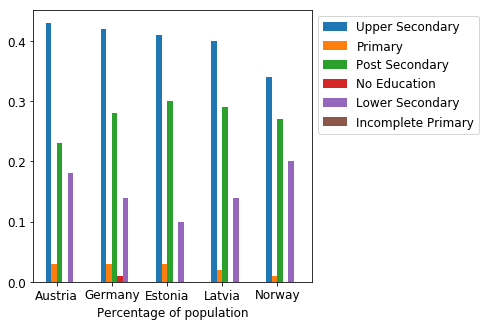

In [343]:
w = .2
ind = np.array(range(0, 10, 2))
ax = plt.subplot(111)
df2020 = df2020.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2020'], ascending = [0])
ax.bar(ind, df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2020"], w, label="Upper Secondary")
ax.bar(ind+w, df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2020"], w, label="Primary")
ax.bar(ind + (w*2), df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2020"], w, label="Post Secondary")
ax.bar(ind  + (w*3), df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2020"], w, label="No Education")
ax.bar(ind + (w*4), df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2020"], w, label="Lower Secondary")
ax.bar(ind + (w*5), df2020["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2020"], w, label="Incomplete Primary")
ax.set_xticks(ind + (w * 1.5))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(df2020["Country Name"])
ax.set_xlabel('Percentage of population')
plt.show()

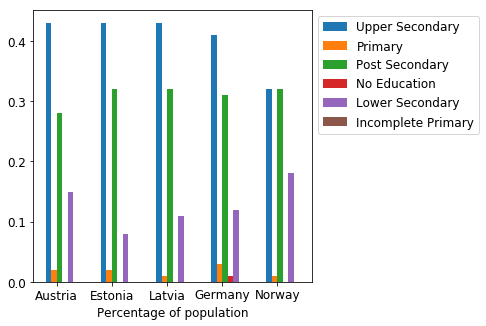

In [342]:
w = .2
ind = np.array(range(0, 10, 2))
ax = plt.subplot(111)
df2030 = df2030.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2030'], ascending = [0])
ax.bar(ind, df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2030"], w, label="Upper Secondary")
ax.bar(ind+w, df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2030"], w, label="Primary")
ax.bar(ind + (w*2), df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2030"], w, label="Post Secondary")
ax.bar(ind  + (w*3), df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2030"], w, label="No Education")
ax.bar(ind + (w*4), df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2030"], w, label="Lower Secondary")
ax.bar(ind + (w*5), df2030["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2030"], w, label="Incomplete Primary")
ax.set_xticks(ind + (w * 1.5))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(df2030["Country Name"])
ax.set_xlabel('Percentage of population')
plt.show()

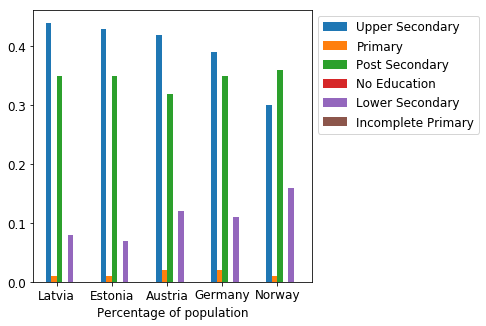

In [344]:
w = .2
ind = np.array(range(0, 10, 2))
ax = plt.subplot(111)
df2040 = df2040.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2040'], ascending = [0])
ax.bar(ind, df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2040"], w, label="Upper Secondary")
ax.bar(ind+w, df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2040"], w, label="Primary")
ax.bar(ind + (w*2), df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2040"], w, label="Post Secondary")
ax.bar(ind  + (w*3), df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2040"], w, label="No Education")
ax.bar(ind + (w*4), df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2040"], w, label="Lower Secondary")
ax.bar(ind + (w*5), df2040["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2040"], w, label="Incomplete Primary")
ax.set_xticks(ind + (w * 1.5))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(df2040["Country Name"])
ax.set_xlabel('Percentage of population')
plt.show()

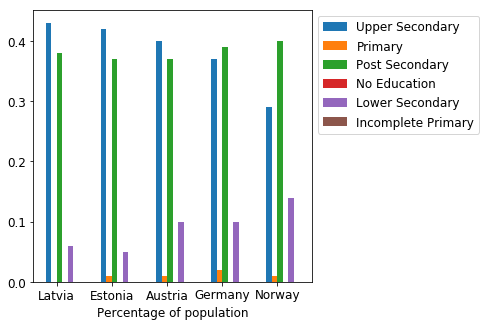

In [345]:
w = .2
ind = np.array(range(0, 10, 2))
ax = plt.subplot(111)
df2050 = df2050.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2050'], ascending = [0])
ax.bar(ind, df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2050"], w, label="Upper Secondary")
ax.bar(ind+w, df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2050"], w, label="Primary")
ax.bar(ind + (w*2), df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2050"], w, label="Post Secondary")
ax.bar(ind  + (w*3), df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2050"], w, label="No Education")
ax.bar(ind + (w*4), df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2050"], w, label="Lower Secondary")
ax.bar(ind + (w*5), df2050["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2050"], w, label="Incomplete Primary")
ax.set_xticks(ind + (w * 1.5))
#ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(df2050["Country Name"])
ax.set_xlabel('Percentage of population')
plt.show()

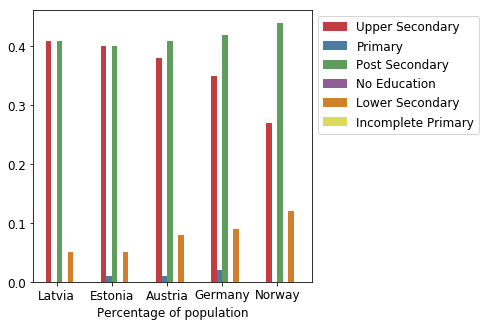

In [479]:
w = .2
ind = np.array(range(0, 10, 2))
ax = plt.subplot(111)
df2060 = df2060.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2060'], ascending = [0])
ax.bar(ind, df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2060"], w, label="Upper Secondary")
ax.bar(ind+w, df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2060"], w, label="Primary")
ax.bar(ind + (w*2), df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2060"], w, label="Post Secondary")
ax.bar(ind  + (w*3), df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2060"], w, label="No Education")
ax.bar(ind + (w*4), df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2060"], w, label="Lower Secondary")
ax.bar(ind + (w*5), df2060["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2060"], w, label="Incomplete Primary")
ax.set_xticks(ind + (w * 1.5))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(df2060["Country Name"])
ax.set_xlabel('Percentage of population')
plt.show()

But why is it so? Does GPI is relevant here? Let's see. 

In [442]:
rows_with_gpi= []
for row in all_unique_indicators: 
    if "GDP" in row and "Government" in row and "education" in row :
        rows_with_gpi.append(row)
        
rows_with_gpi_data = data[data["Indicator Name"].isin(rows_with_gpi)]


filtered_df = pd.DataFrame({'Country Name': rows_with_gpi_data["Country Name"], 'Country Code': rows_with_gpi_data["Country Code"], 
                         '2010': rows_with_gpi_data["2010"], '2015': rows_with_gpi_data["2015"], 'Indicator Name': rows_with_gpi_data["Indicator Name"], 
                        'Indicator Code': rows_with_gpi_data["Indicator Code"]})


filtered_df= filtered_df[filtered_df["Country Name"].isin(pisa["Country Name"])]
cols =rows_with_gpi.append("Country Name")

dataframe_by_i_2010 = pd.DataFrame( columns=cols)
#dataframe_by_indicator_2010["Country Name"] = all_countries
frames = []
print(rows_with_gpi)
for indicator in rows_with_gpi: 
    vals = filtered_df[filtered_df["Indicator Name"] == indicator]
    frames.append(vals)


dic_2010 = defaultdict(float)
dic_2015 = defaultdict(float)
#first = first.reset_index()
#print(dataframes[0])
dic_2010["Country Name"] = dictionary_2015["Country Name"]
dic_2015["Country Name"] = dictionary_2015["Country Name"]
i = 0
print(len(frames))
for frame in frames: 
    i += 1
    if i != 10: 

        frame = frame.reset_index()
        dic_2010[frame["Indicator Name"].unique()[0] + " 2010"] = frame["2010"]
        dic_2015[frame["Indicator Name"].unique()[0] + " 2015"] = frame["2015"]
        

df10 = pd.DataFrame.from_dict(dic_2010, 'columns')
df10
df10 = df10.fillna(0)
df15 = pd.DataFrame.from_dict(dic_2015, 'columns')
df15 = df15.fillna(0)

['Government expenditure in educational institutions as % of GDP (%)', 'Government expenditure in secondary institutions education as % of GDP (%)', 'Government expenditure on education as % of GDP (%)', 'Government expenditure on post-secondary non-tertiary education as % of GDP (%)', 'Government expenditure on pre-primary education as % of GDP (%)', 'Government expenditure on primary education as % of GDP (%)', 'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)', 'Government expenditure on secondary education as % of GDP (%)', 'Government expenditure on tertiary education as % of GDP (%)', 'Country Name']
10


In [443]:
df10.head()

,Country Name,Government expenditure in educational institutions as % of GDP (%) 2010,Government expenditure in secondary institutions education as % of GDP (%) 2010,Government expenditure on education as % of GDP (%) 2010,Government expenditure on post-secondary non-tertiary education as % of GDP (%) 2010,Government expenditure on pre-primary education as % of GDP (%) 2010,Government expenditure on primary education as % of GDP (%) 2010,Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%) 2010,Government expenditure on secondary education as % of GDP (%) 2010,Government expenditure on tertiary education as % of GDP (%) 2010
0,Argentina,4.58268,1.81621,4.99483,0.00000,0.34258,1.52263,0.0,1.82643,0.91474
1,Australia,4.90970,1.89986,5.55523,0.10592,0.06497,2.04976,0.0,2.04875,1.24057
2,Austria,5.10272,2.41679,5.71780,0.02662,0.59127,0.98086,0.0,2.53961,1.58666
3,Belgium,6.09601,2.62708,6.40976,0.00000,0.60722,1.50694,0.0,2.72371,1.42054
4,Brazil,5.47888,2.46205,5.64277,0.00000,0.42982,1.76909,0.0,2.52239,0.92607


In [460]:
df10.shape
df10 = df10.sort_values(["Government expenditure on education as % of GDP (%) 2010"], ascending=[1])
df15 = df15.sort_values(["Government expenditure on education as % of GDP (%) 2015"], ascending=[1])

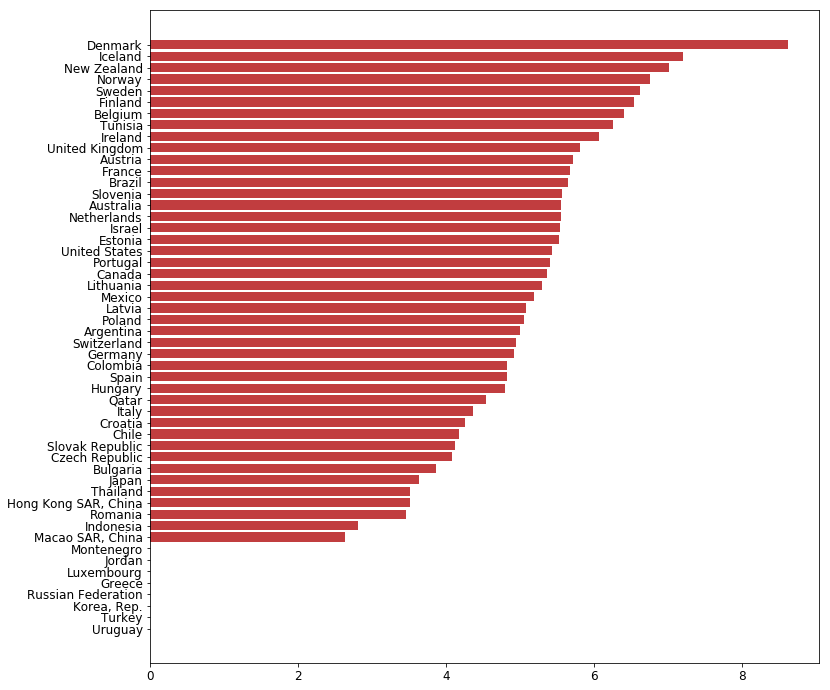

In [459]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.barh([x for x in range(52)],df10["Government expenditure on education as % of GDP (%) 2010"])
matplotlib.rcParams.update({'font.size': 12})
names = df10["Country Name"]
ax.set_yticks(np.arange(len(names)))
ax.set_yticklabels(names)

plt.show()

In [463]:
df10 = df10.drop(["Country Name"], axis=1)
xstd10 = StandardScaler().fit_transform(df10)
Z10 = linkage(xstd10,  method='ward')
c, coph_dists = cophenet(Z10, pdist(xstd10))

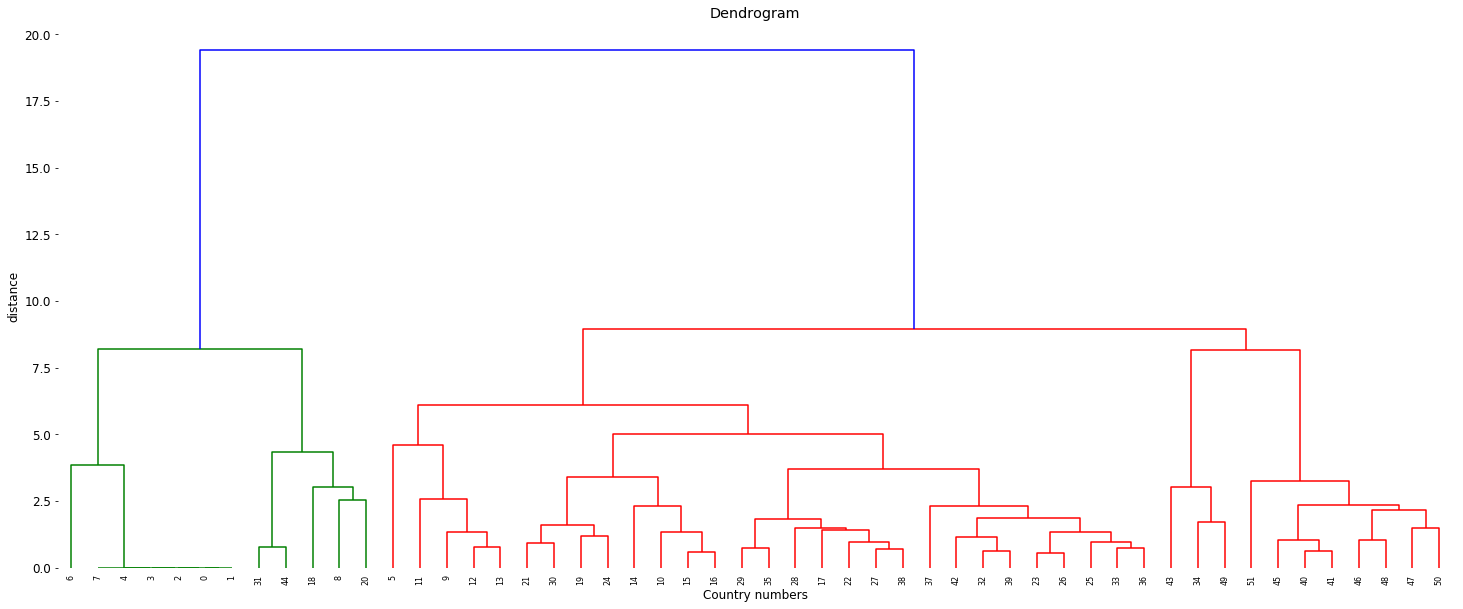

In [470]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Country numbers')
plt.ylabel('distance')
den10 = dendrogram(
    Z10,

    leaf_rotation=90.,  
    leaf_font_size=8., 
)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);
plt.show()

In [642]:
df2020 = df2020.drop(["Country Name"], axis=1)
df2030 = df2030.drop(["Country Name"], axis=1)
df2040 = df2040.drop(["Country Name"], axis=1)
df2050 = df2050.drop(["Country Name"], axis=1)
df2060 = df2060.drop(["Country Name"], axis=1)
df2070 = df2070.drop(["Country Name"], axis=1)
df2080 = df2080.drop(["Country Name"], axis=1)
df2090 = df2090.drop(["Country Name"], axis=1)
frames = [df, df1, df2020, df2030, df2040, df2050, df2060, df2070, df2080, df2090, df2100]
result = pd.concat(frames, axis=1)

In [643]:
result.head(20)
result["Country Name"]

0                Argentina
1                Australia
2                  Austria
3                  Belgium
4                   Brazil
5                 Bulgaria
6                   Canada
7                    Chile
8                 Colombia
9                  Croatia
10          Czech Republic
11                 Denmark
12                 Estonia
13                 Finland
14                  France
15                 Germany
16                  Greece
17    Hong Kong SAR, China
18                 Hungary
19                 Iceland
20               Indonesia
21                 Ireland
22                  Israel
23                   Italy
24                   Japan
25                  Jordan
26             Korea, Rep.
27                  Latvia
28               Lithuania
29              Luxembourg
30        Macao SAR, China
31                  Mexico
32              Montenegro
33             Netherlands
34             New Zealand
35                  Norway
36                  Poland
3

In [627]:
result = result.fillna(0)
result = result.drop(["Country Name"], axis=1)
xstd = StandardScaler().fit_transform(result)
pca = PCA(n_components=5)
comp = pca.fit_transform(xstd)
pdf = pd.DataFrame( data=comp, columns=['comp1', 'comp2', 'comp3', 'comp4','comp5'])

In [628]:
pdf

,comp1,comp2,comp3,comp4,comp5
0,14.395881,-8.125072,-0.338027,2.658876,-7.223039
1,-10.939895,6.078522,4.669851,3.476066,-0.428986
2,-10.320355,3.050809,0.055079,-3.738155,0.025761
3,-9.967197,14.809801,0.366219,0.348977,2.461760
4,25.825674,-12.232267,1.080689,2.401797,9.919715
5,-9.287895,-10.559433,0.157308,-2.581176,0.087396
6,-16.047487,22.338290,10.292512,2.889125,1.297705
7,2.502965,-6.393102,-0.363277,5.169399,-2.053662
8,17.580138,3.341262,8.749541,13.699485,6.672447
9,-9.830691,-20.215494,1.714580,3.267878,-0.188323


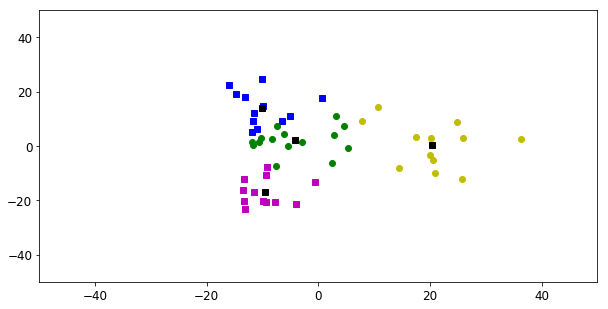

In [631]:
x = np.array(pdf)
kmean, _ = kmeans(x, 5)
idx, _ = vq(x, kmean)
plt.plot(x[idx==0,0],x[idx==0,1],'sb',
     x[idx==1,0],x[idx==1,1],'sr',
     x[idx==2,0],x[idx==2,1],'og',
        x[idx==3,0],x[idx==3,1],'oy',
        x[idx==4,0],x[idx==4,1],'sm')
#rcParams['figure.figsize'] = 5,5
plt.plot(kmean[:,0],kmean[:,1],'sk',markersize=6)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

In [687]:
cluster1a1 = []
cluster2a1 = []
cluster3a1 = []
cluster4a1 = []
cluster5a1 = []
for i in range(52):
    if idx[i] == 4:
        cluster5a1.append(dictionary_2010["Country Name"][i])
    if idx[i] == 3:
        cluster4a1.append(dictionary_2010["Country Name"][i])   
    if idx[i] == 2:
        cluster3a1.append(dictionary_2010["Country Name"][i])
    if idx[i] == 1:
        cluster2a1.append(dictionary_2010["Country Name"][i])
    if idx[i] == 0:
        cluster1a1.append(dictionary_2010["Country Name"][i])

In [632]:
p = []
i = []
l =[]
n = []
pr = []
u = []


row = result.iloc[12]

In [634]:
postsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total "
incprim  = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total "
lsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total "
noed = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total "
prim = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total "
upsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total "
years = ["2010", "2015", "2020", "2030", "2040", "2050", "2060", "2070", "2080", "2090", "2100"]
for year in years: 
    p.append(row[postsec + year])
    i.append(row[incprim + year])
    l.append(row[lsec + year])
    n.append(row[noed + year])
    pr.append(row[prim + year])
    u.append(row[upsec + year])
    

In [648]:
print(p)

[0.26000000000000001, 0.28000000000000003, 0.29999999999999999, 0.32000000000000001, 0.34999999999999998, 0.37, 0.40000000000000002, 0.42999999999999999, 0.45000000000000001, 0.46999999999999997, 0.5, 0.26000000000000001, 0.28000000000000003, 0.29999999999999999, 0.32000000000000001, 0.34999999999999998, 0.37, 0.40000000000000002, 0.42999999999999999, 0.45000000000000001, 0.46999999999999997, 0.5]


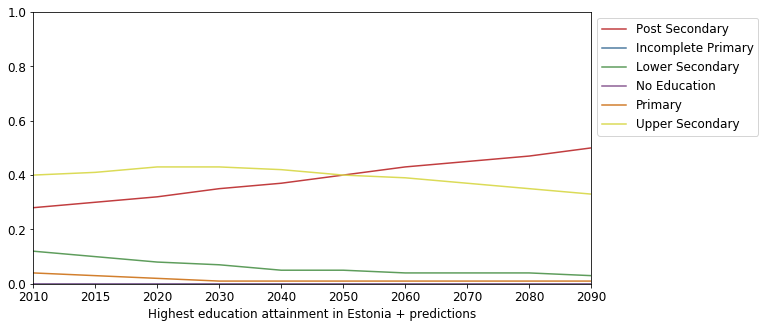

In [635]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)
ax.plot(p, label="Post Secondary")
ax.plot(i, label="Incomplete Primary")
ax.plot(l, label= "Lower Secondary")
ax.plot(n, label="No Education")
ax.plot(pr, label="Primary")
ax.plot(u, label="Upper Secondary")
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Highest education attainment in Estonia + predictions')
plt.show()

In [637]:
clust = defaultdict(list)
for i in range(52):
    clust[str(idx[i])] += [dictionary_2010["Country Name"][i]]

In [664]:
postsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total "
incprim  = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total "
lsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total "
noed = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total "
prim = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total "
upsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total "
years = ["2010", "2015", "2020", "2030", "2040", "2050", "2060", "2070", "2080", "2090", "2100"]

clustdict = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
for key in clust.keys():
    for country in clust.get(key):
        for year in years: 
            row = result[result["Country Name"] == country]
            clustdict[key]["post"][year] += [row[postsec + year].values[0]]
            clustdict[key]["inc"][year] += [row[incprim + year].values[0]]
            clustdict[key]["ls"][year] += [row[lsec + year].values[0]]
            clustdict[key]["n"][year] += [row[noed + year].values[0]]
            clustdict[key]["pri"][year] += [row[prim + year].values[0]]
            clustdict[key]["up"][year] += [row[upsec + year].values[0]]
            
    

In [665]:
clustdict

defaultdict(<function __main__.<lambda>>,
            {'0': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {'inc': defaultdict(list,
                                      {'2010': [0.01,
                                        0.0,
                                        0.0,
                                        0.0,
                                        0.059999999999999998,
                                        0.0,
                                        0.0,
                                        0.01,
                                        0.01,
                                        0.01,
                                        0.01,
                                        0.0],
                                       '2015': [0.01,
                                        0.0,
                                        0.0,
                                        0.0,
                                        0.050000000000000003,
       

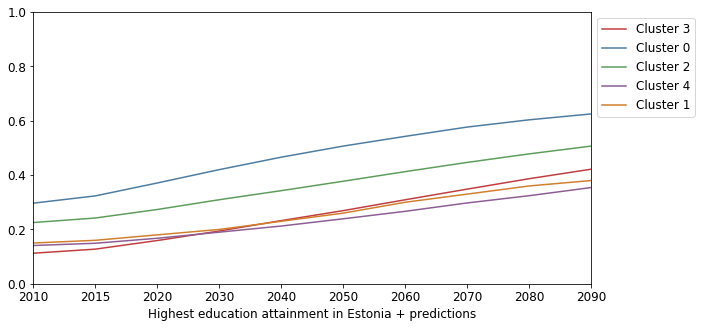

In [681]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("post").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Post Secondary by clusters')
plt.show()     

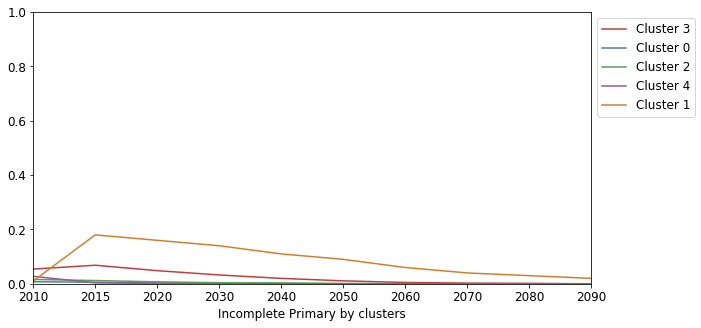

In [682]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("inc").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Incomplete Primary by clusters')
plt.show()   

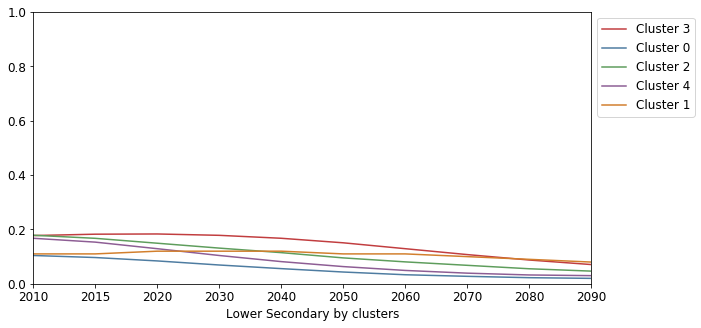

In [683]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("ls").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Lower Secondary by clusters')
plt.show() 

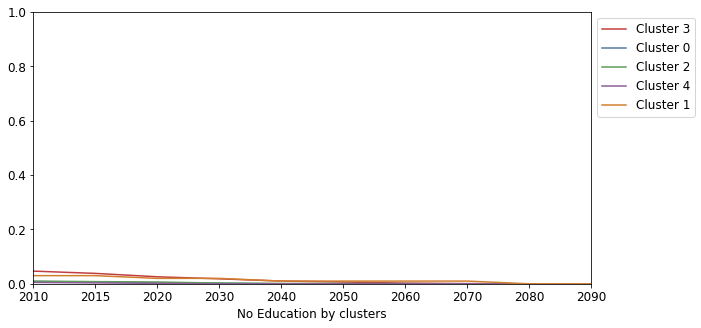

In [684]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("n").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('No Education by clusters')
plt.show() 

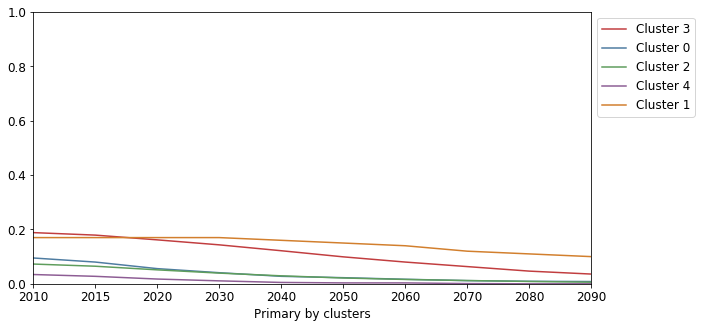

In [685]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("pri").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Primary by clusters')
plt.show() 

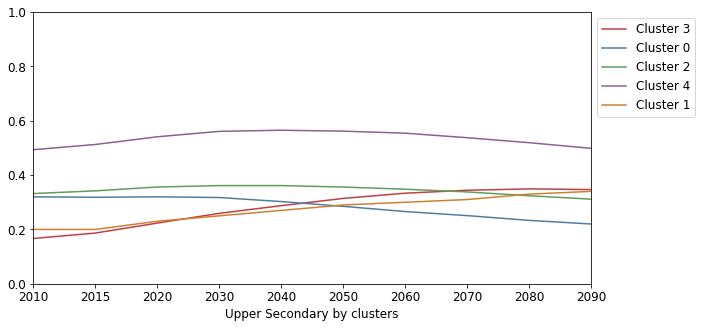

In [686]:
ax = plt.subplot(111)
matplotlib.rcParams.update({'font.size': 12})
#rcParams['figure.figsize'] = 10, 5
plt.xlim(1, 10)
plt.ylim(0, 1)



for key in clustdict.keys():
    
    u = []
    v = clustdict.get(key).get("up").values()
    for val in v:
        u.append(np.mean(val))
    ax.plot(u,  label = "Cluster " +key )
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(years)
ax.set_xlabel('Upper Secondary by clusters')
plt.show() 

In [688]:
print(cluster1a1)
print(cluster2a1)
print(cluster3a1)
print(cluster4a1)
cluster5a1


['Australia', 'Belgium', 'Canada', 'France', 'Hong Kong SAR, China', 'Iceland', 'Ireland', 'Japan', 'Korea, Rep.', 'Lithuania', 'New Zealand', 'Sweden']
['Qatar']
['Austria', 'Chile', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Israel', 'Latvia', 'Luxembourg', 'Macao SAR, China', 'Netherlands', 'Norway', 'Spain', 'United States']
['Argentina', 'Brazil', 'Colombia', 'Indonesia', 'Jordan', 'Mexico', 'Portugal', 'Thailand', 'Tunisia', 'Turkey', 'United Kingdom', 'Uruguay']


['Bulgaria',
 'Croatia',
 'Czech Republic',
 'Hungary',
 'Italy',
 'Montenegro',
 'Poland',
 'Romania',
 'Russian Federation',
 'Slovak Republic',
 'Slovenia',
 'Switzerland']

In [ ]:
print("kana")